# Joomi Shim

## Research question

Medical expense dataset includes many interesting factors such as smoking status that affect the the amount of personal charges. I think it will be intriguing to find out the correlation between each factor and the causes of high charges to prevent high medical expenses in the future.

#### To what extent would the factors in the dataset affect the personal medical expense?

In [1]:
#setup
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import Data

In [2]:
df = pd.read_csv('../data/raw/insurance_raw1.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Milestone 3

### Task 1

#### Exploratory Data Analysis:

In [3]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)

Number of rows and columns respectively: (1338, 7)
Columns in the dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.nunique(axis=0)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Correlation Matrix


<AxesSubplot:>

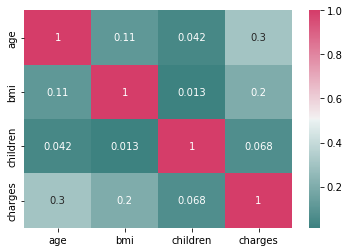

In [8]:
print("Correlation Matrix")
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(190, 0, as_cmap=True))

Coefficient '1' stands for perfect correlation and '0' stands for no correlation (= random). The correlation matrix above shows that there are weak positive relationships among charges and other variables. 

Most coefficients are close to 0, meaning that they have relatively low relationships between the variables. Between charges and age, and charges and bmi, however, you can observe positive correlation of 0.3 and 0.2 respectively.

In [9]:
df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


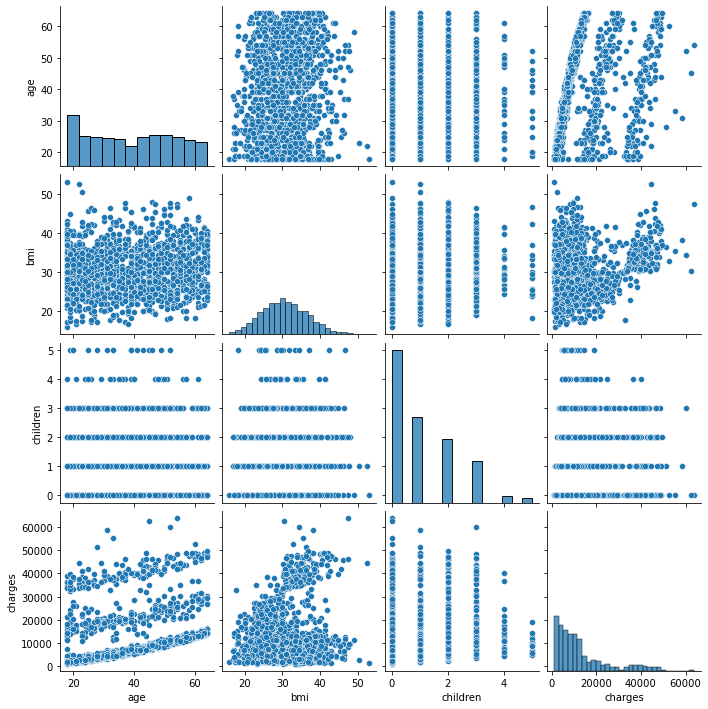

In [11]:
sns.pairplot(df)

<AxesSubplot:>

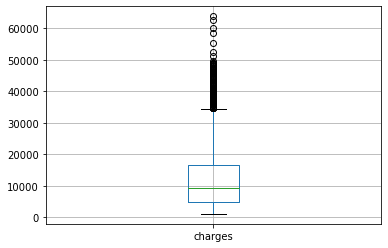

In [12]:
df.boxplot('charges')

From the boxplot above, you can see that there are a number of outliers for charges in the upper range and that most of the charges fall between 0 and $35,000.

<AxesSubplot:ylabel='Frequency'>

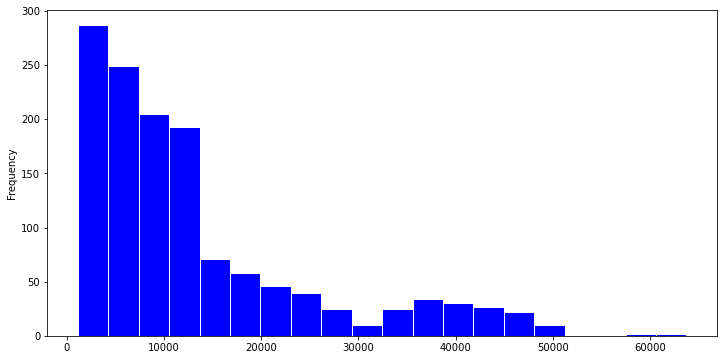

In [13]:
df['charges'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='blue',edgecolor='white')

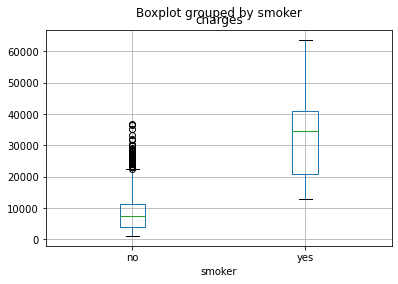

In [14]:
boxplot = df.boxplot(column=['charges'],by="smoker")
boxplot.plot()
plt.show()

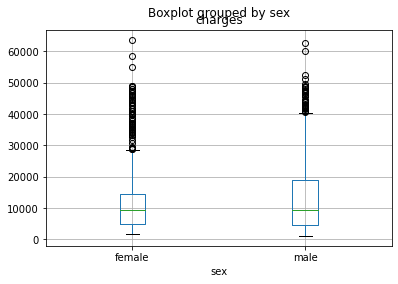

In [15]:
boxplot = df.boxplot(column=['charges'],by="sex")
boxplot.plot()
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

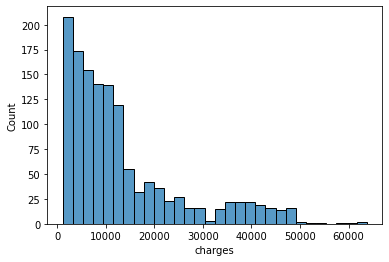

In [16]:
sns.histplot(df['charges'])

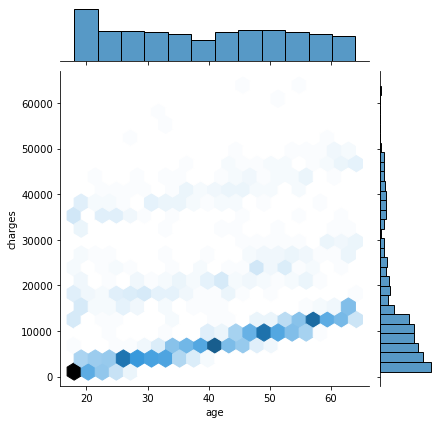

In [17]:
sns.jointplot(x='age',y='charges', data = df, kind = 'hex')

### Task 2 & 3

In [117]:
import projectfunction1 as p1
import statistics as st

#### Analysis Pipeline

##### 1. Load Raw Data

In [118]:
data ='../data/raw/insurance_raw1.csv'
dfu = p1.unprocessed(data)
dfu

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##### 2. Process Data

In [121]:
dfp = p1.load_and_process(data)
dfp

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.8,0,no,southeast,1634.0
482,18,female,31.4,0,no,southeast,1622.2
492,18,female,25.1,0,no,northeast,2196.5
525,18,female,33.9,0,no,southeast,11482.6
529,18,male,25.5,0,no,northeast,1708.0
...,...,...,...,...,...,...,...
398,64,male,25.6,2,no,southwest,14988.4
335,64,male,34.5,0,no,southwest,13822.8
378,64,female,30.1,3,no,northwest,16455.7
1265,64,male,23.8,0,yes,southeast,26926.5


**Second processed data**: replaced the values in *'smoker'* and *'sex'* columns as *0* & *1* for ease:

- *smoker* as *1*, *non-smoker* as *0*
- *female* as *1*, *male* as *0*

In [123]:
dfp1 = p1.replace_object(data)
dfp1

,age,sex,bmi,smoker,charges
0,19,1,27.9,1,16884.9
1,18,0,33.8,0,1725.6
2,28,0,33.0,0,4449.5
3,33,0,22.7,0,21984.5
4,32,0,28.9,0,3866.9
...,...,...,...,...,...
1333,50,0,31.0,0,10600.5
1334,18,1,31.9,0,2206.0
1335,18,1,36.8,0,1629.8
1336,21,1,25.8,0,2007.9


### Task 4

#### Data Analysis - Medical Expense

In [124]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1248 to 635
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [125]:
dfp.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [126]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.00,51.0,64.0
bmi,1338.0,30.663303,6.098257,16.0,26.3,30.40,34.7,53.1
children,1338.0,1.094918,1.205493,0.0,0.0,1.00,2.0,5.0
charges,1338.0,13270.422347,12110.011368,1121.9,4740.3,9382.05,16639.9,63770.4


**Analysis**:
- The number of male and female are 676 and 662, respectively.
- The number of smoker and non-smoker are 1064 and 274, respectively.
- The average charge for medical expense is $13,270.42.
- The average body mass index is 30.66. The average BMI falls within the obesity range.
    - BMI < 18.5 = underweight range
    - 18.5 < BMI < 25.0 = healthy weight range
    - 25.0 < BMI < 30.0 = overweight range
    - 30.0 > BMI = obesity range

<AxesSubplot:>

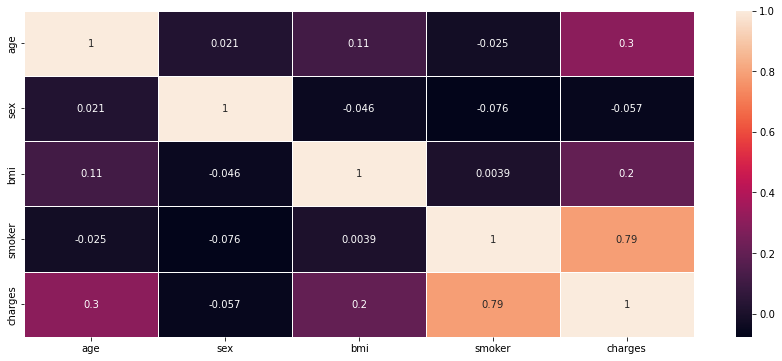

In [129]:
heatmap=dfp1.corr()
ax= plt.figure(figsize=(15,6))
sns.heatmap(heatmap,linewidths=1,linecolor='white',annot=True)

We will explore the relationship between charges and each variable.
1. Age
2. Sex
3. Smokers vs. Non-smokers
4. Body Mass Index
5. Region

#### 1. Age

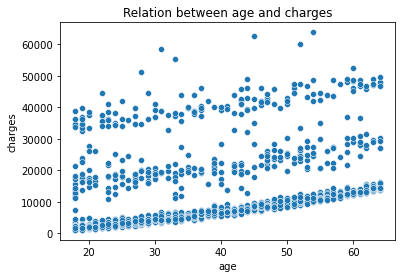

In [131]:
plt.title('Relation between age and charges')
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()

The graph above shows a positive relationship between age and charges: the older you are, the higher charges you pay.

<AxesSubplot:title={'center':'Charges by age'}, xlabel='Age', ylabel='Charges'>

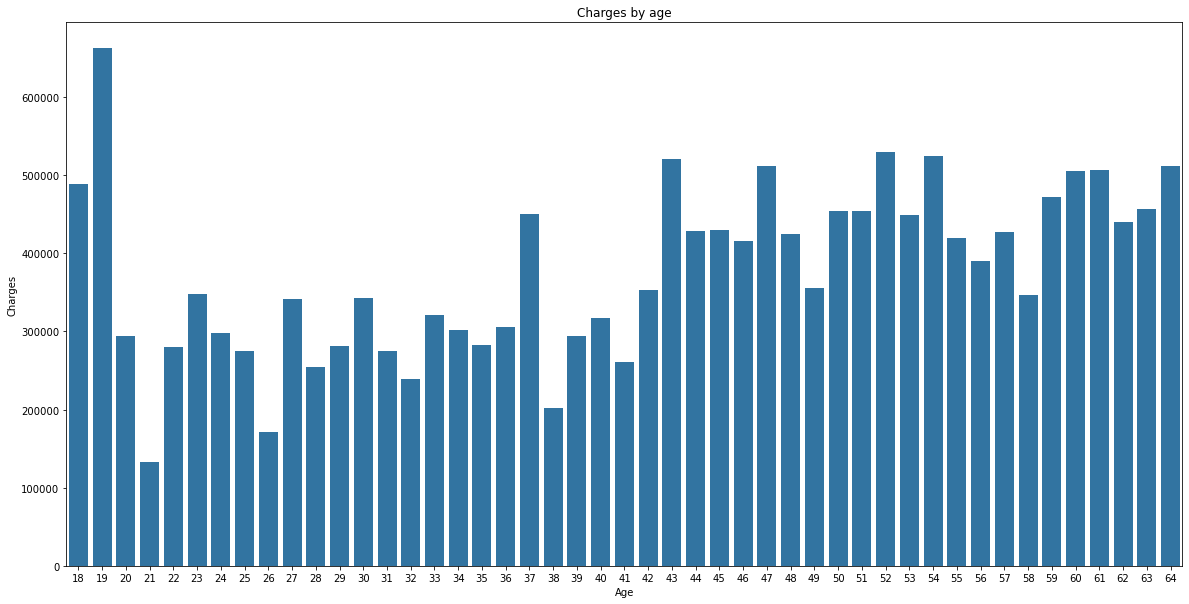

In [148]:
df = p1.Age(dfp)
a4_dims = (20, 10)
fig, a = plt.subplots(figsize = a4_dims)
aa = sns.barplot(x="age", y="charges", data=df, color="tab:blue")
aa.set_title("Charges by age")
aa.set_xlabel("Age")
aa.set_ylabel("Charges")
aa

In [152]:
#for i in range(18,64):
    #print("Mean charge for ",i," year old is $",st.mean(dfu['charges'][(dfu["age"] == i)]))

19 year old has abnormally high charges because there are many 19 year olds.

#### 2. Sex

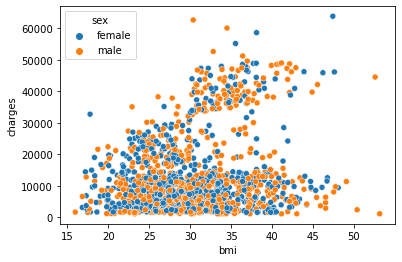

In [135]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['sex'])
plt.show()

In [143]:
data ='../data/raw/insurance_raw1.csv'
dfu = p1.unprocessed(data)
st.mean(dfu["charges"])
condition1 = dfu['sex'] == "male"
print(st.mean(dfu.loc[condition1, 'charges']))
condition2 = dfu['sex'] == "female"
print(st.mean(dfu.loc[condition2, 'charges']))

13956.751177721893
12569.578843835347


The scatter plot above shows no correlation between sex and charges. 

#### 3. Smokers vs. Non-smokers

Text(0.5, 1.0, 'Responsiveness of the medical bill to age by smoking status')

<Figure size 432x432 with 0 Axes>

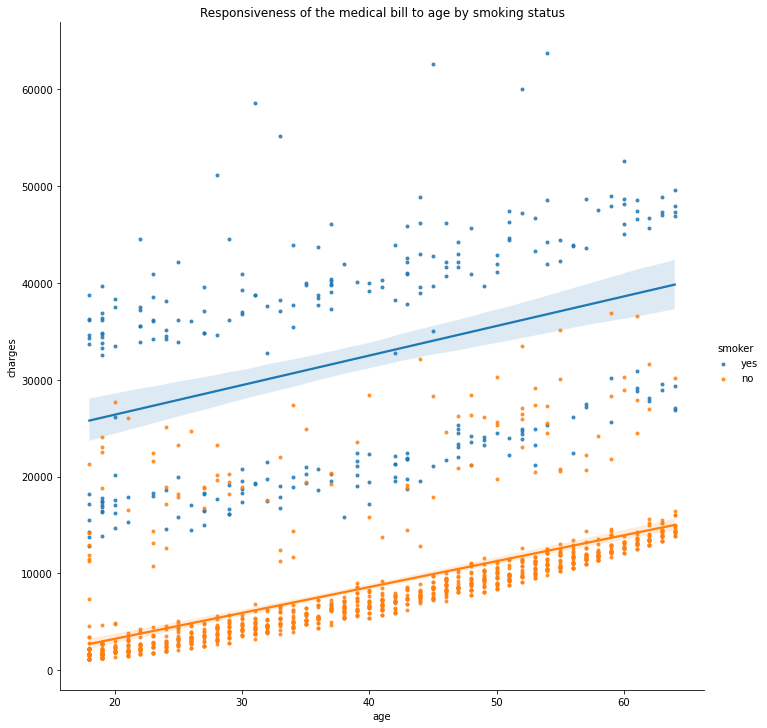

In [112]:
g1 = p1.bysmoker(data)
g1

In [156]:
data ='../data/raw/insurance_raw1.csv'
dfu = p1.unprocessed(data)
st.mean(dfu["charges"])
c1 = dfu['smoker'] == "yes"
print('Average charges for smokers:')
print(st.mean(dfu.loc[c1, 'charges']))
c2 = dfu['smoker'] == "no"
print('Average charges for non-smokers:')
print(st.mean(dfu.loc[c2, 'charges']))

Average charges for smokers:
32050.23183153285
Average charges for non-smokers:
8434.268297856202


The linear line for smokers is much higher, relative to the line for nonsmokers. 

#### 4. Body Mass Index

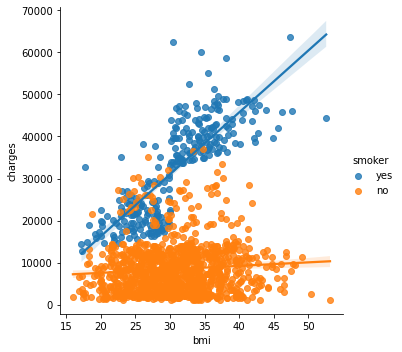

In [137]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

Among non-smokers, the values of BMI do not vary as much as the values for smokers. 

For smokers: the higher BMI you have, the higher medical charges you would pay.

#### 5. Region

Text(0.5, 1.0, 'Responsiveness of the medical bill to age by region')

<Figure size 432x432 with 0 Axes>

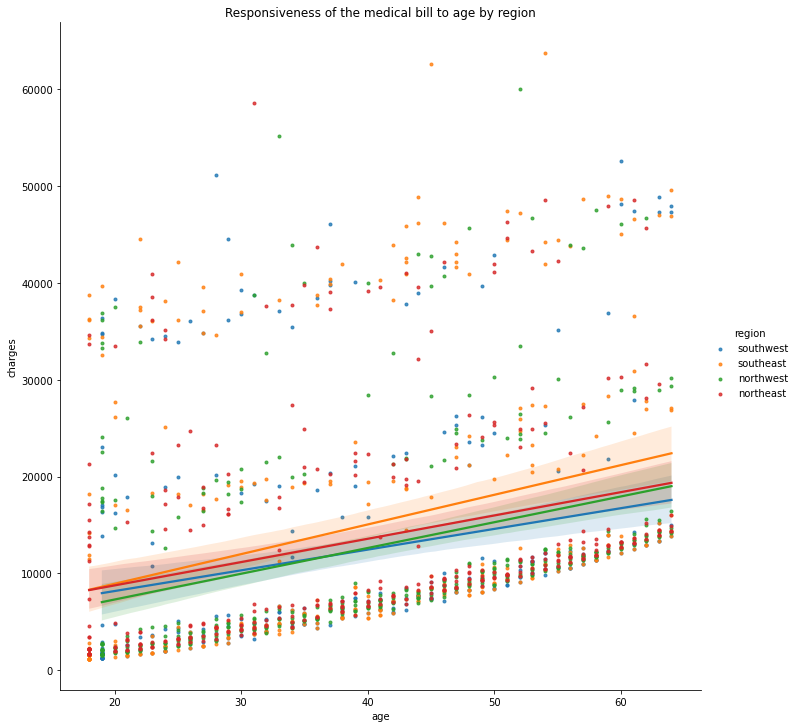

In [141]:
g1 = p1.byregion(data)
g1

Text(0.5, 1.0, 'Charges by regions')

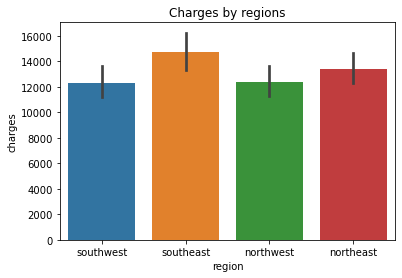

In [142]:
sns.barplot(x=df['region'], y=df['charges'])
plt.title('Charges by regions')

The bar graph above shows different average charges by region. Southeast pays the highest charge in average, followed by Northeast, and Southwest and Northwest pay similar amount of charges.

#### Conclusion


The predictors of amount of medical expense are: age, smoking status, bmi, and region. 
The analysis shows that people who are older, are smokers, have higher bmi, and are from southeast or northeast will tend to pay higher medical expense.